In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### Understanding the Dataset

In [79]:
boston = load_boston()

In [80]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [81]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [82]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [83]:
X_boston = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y_boston = pd.DataFrame(boston['target'], columns=['house_price'])

In [84]:
boston_dataset = pd.merge(X_boston, y_boston, left_index=True, right_index=True)

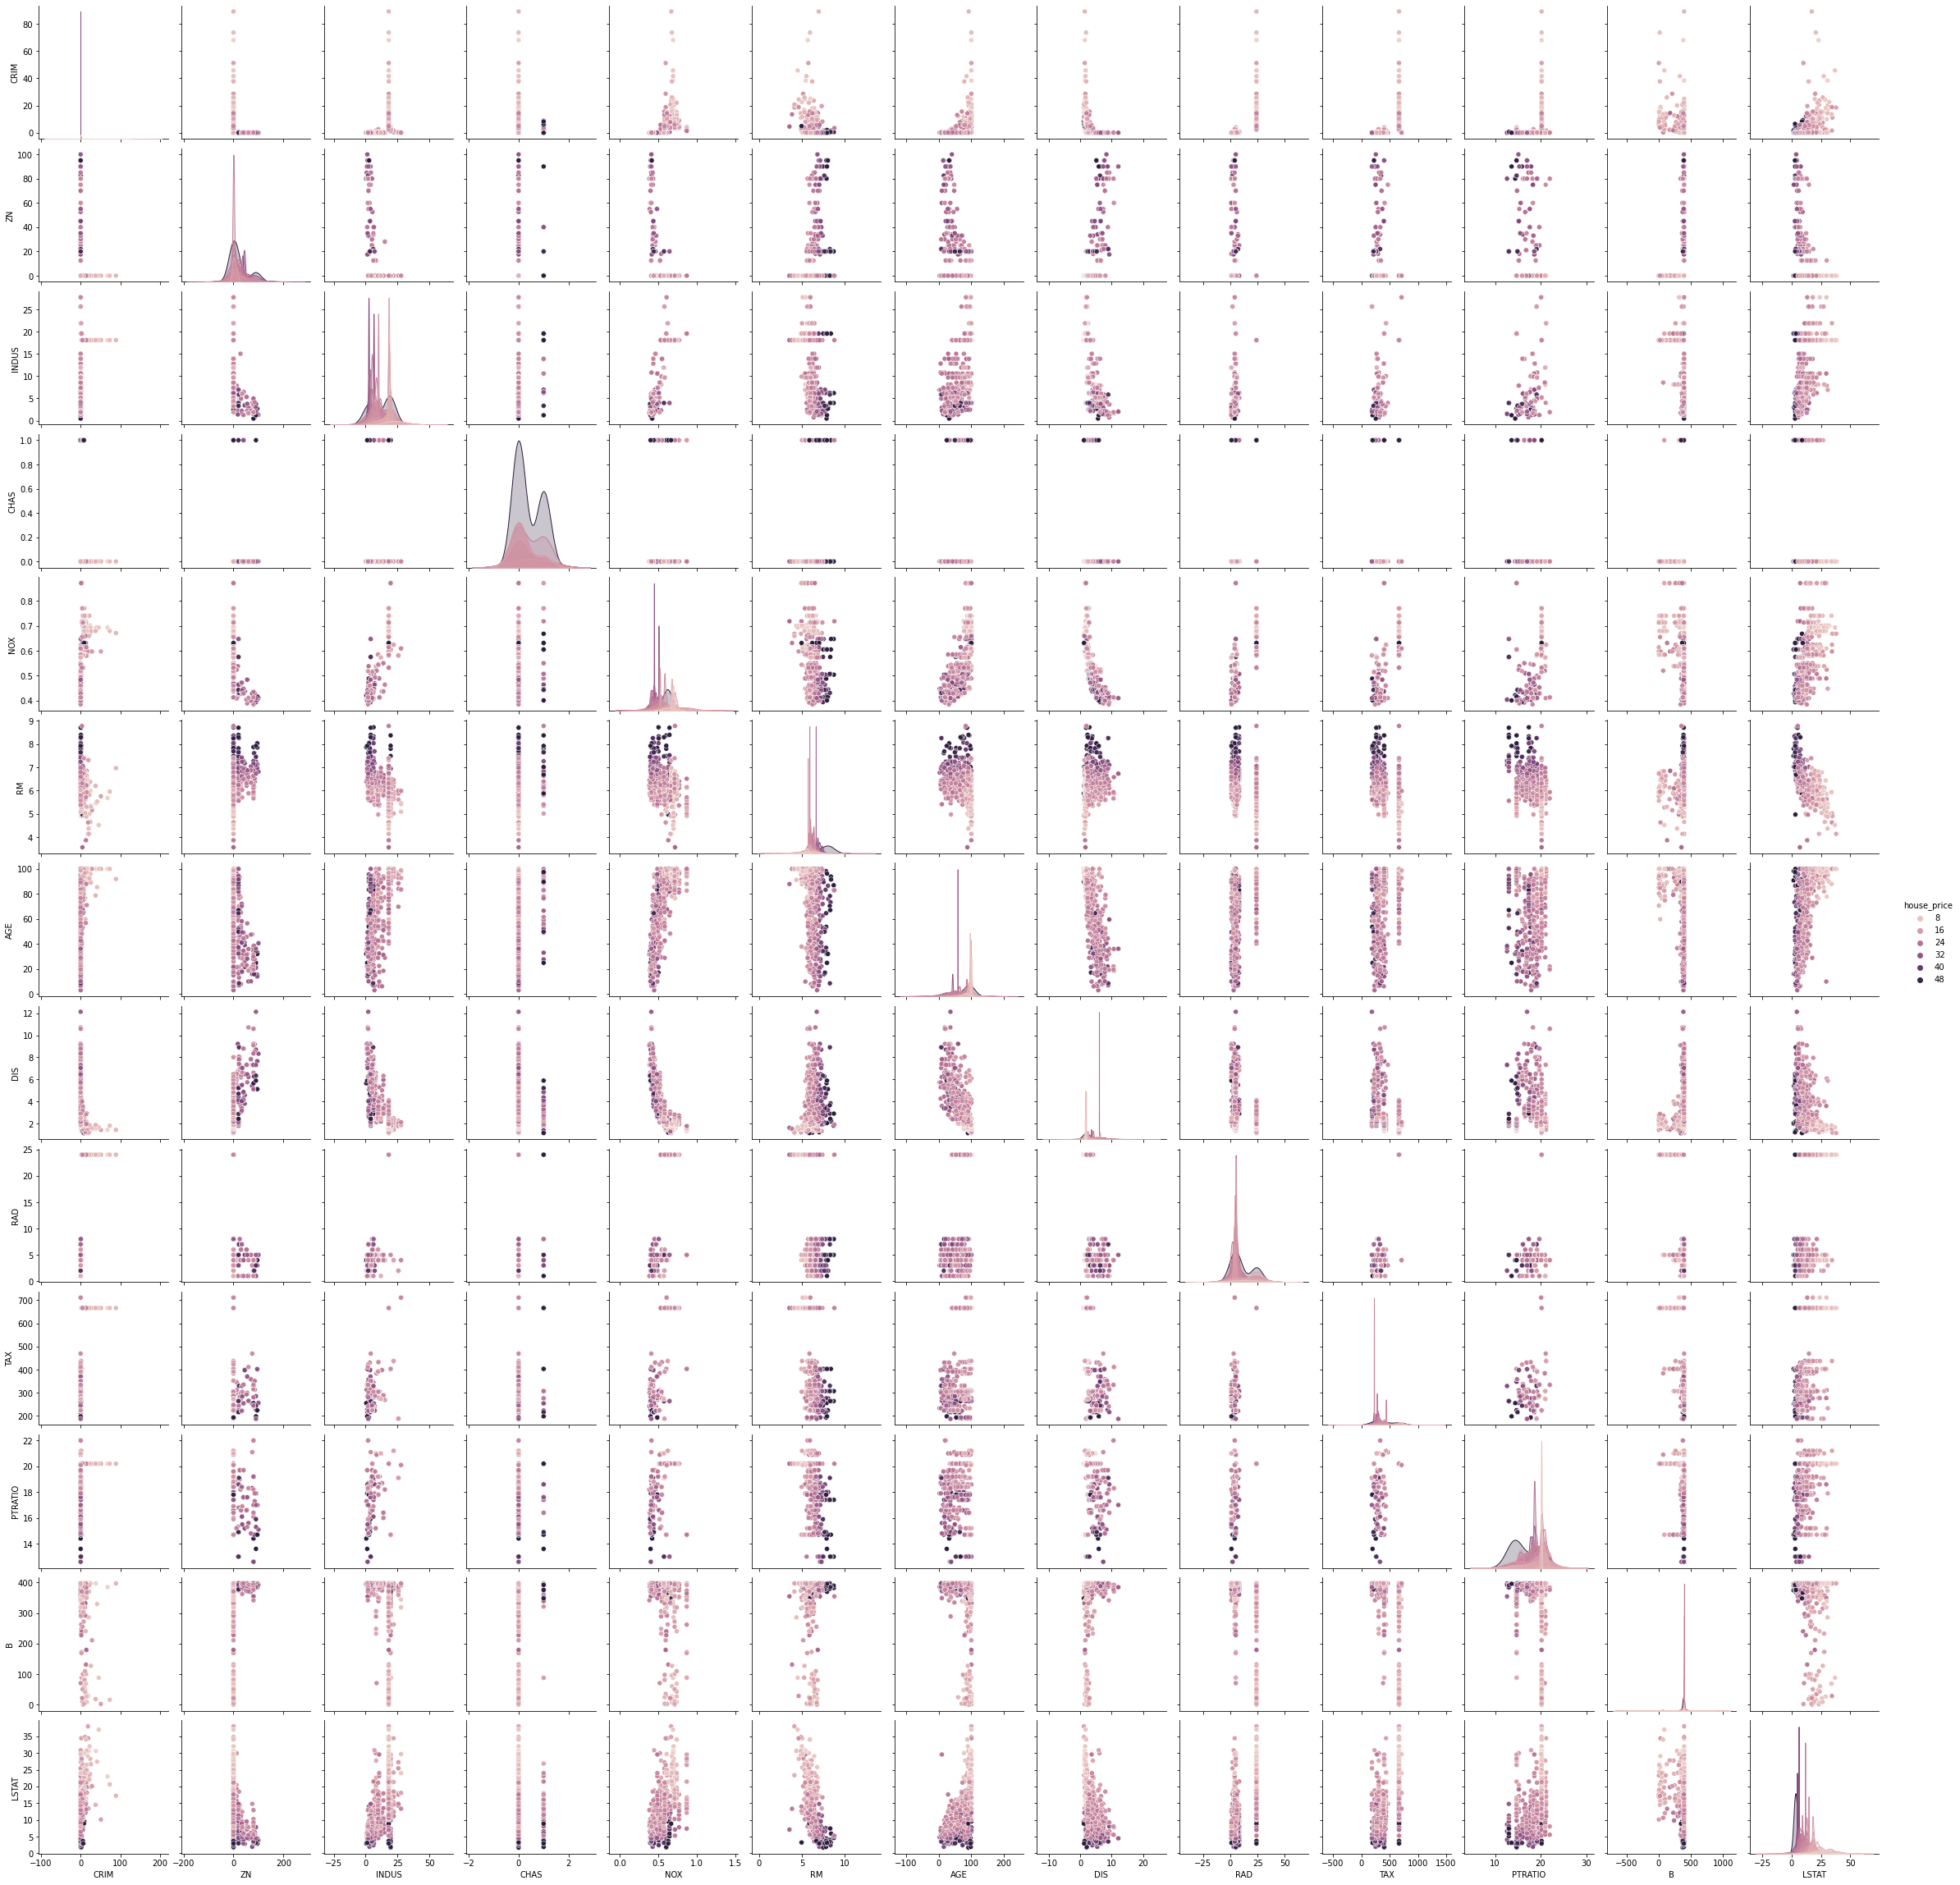

In [85]:
sns.pairplot(boston_dataset, hue='house_price')

### Train Test Split

In [86]:
# you cannot stratify in a continuous condition
X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'], test_size=0.3, random_state=0)

### Linear Regression

In [87]:
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))


0.7645451026942549
0.6733825506400184


In [106]:
reg.n_features_in_

13

### Ridge Regression (L2 Regularisation; Default)

In [88]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
ridge = Ridge(alpha=1).fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

Text(0, 0.5, 'Coefficient Magnitude')

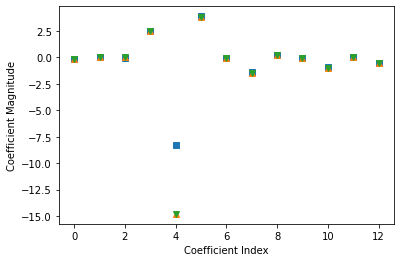

In [89]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, '^', label="Ridge alpha=0.1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=10")
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")

### Lasso Regression (L1 Regularisation)

In [90]:
lasso01 = Lasso(alpha=0.1).fit(X_train, y_train)
lasso = Lasso(alpha=1).fit(X_train, y_train)
lasso10 = Lasso(alpha=10).fit(X_train, y_train)

In [91]:
print(lasso01.score(X_train, y_train))
print(lasso01.score(X_test, y_test))
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))
print(lasso10.score(X_train, y_train))
print(lasso10.score(X_test, y_test))

0.7531274572554778
0.6532086050344972
0.7084095500978869
0.6115433359595555
0.5382460578185544
0.4830050641568526


In [92]:
lasso10.coef_

array([-0.        ,  0.0310504 , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.01099723,
       -0.        ,  0.00623475, -0.55917947])

In [95]:
lasso10.n_features_in_

13